<a href="https://colab.research.google.com/github/arshpreet10/Internity-Winter-Internship/blob/main/License_Plate_Detection_using_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import imutils
import numpy as np
from google.colab.patches import cv2_imshow

In [2]:
image = cv2.imread('images/lp1.jpg')
image = imutils.resize(image, height=640)

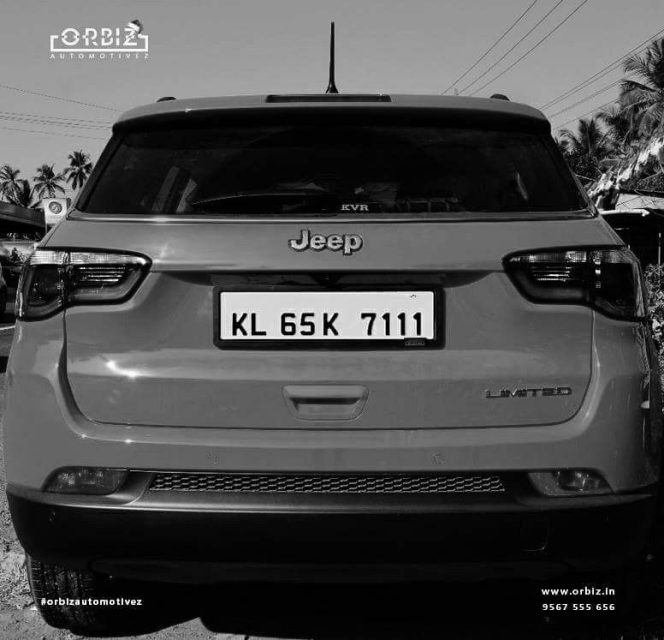

In [3]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

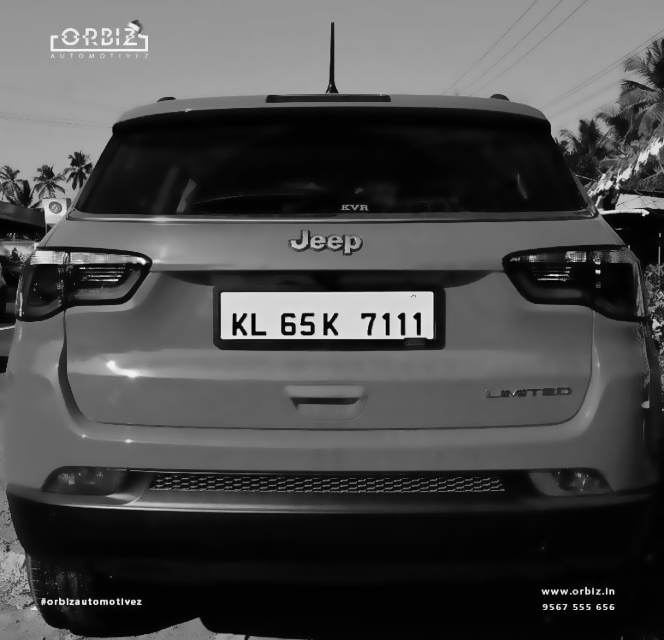

In [4]:
gray = cv2.bilateralFilter(gray, 11, 20, 20)
cv2_imshow(gray)

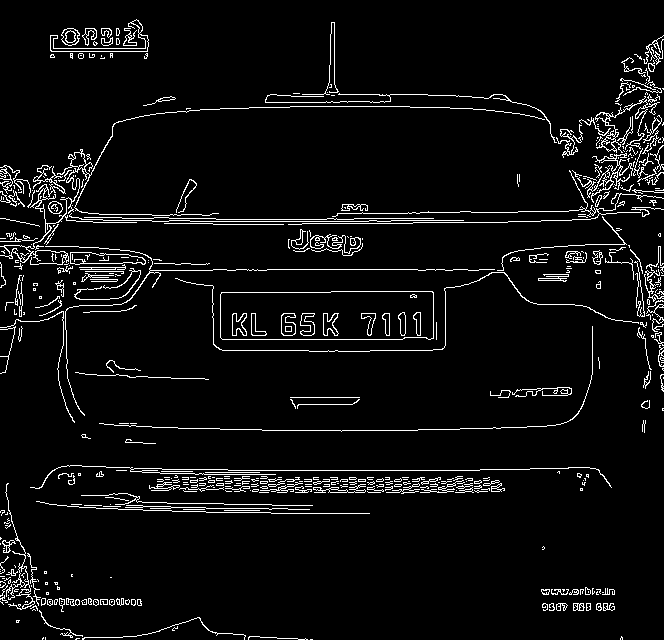

In [5]:
edged = cv2.Canny(gray, 100, 200)
cv2_imshow(edged)

In [6]:
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:50]

In [7]:
for c in cnts:
    
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.018 * peri, True)
 
    if len(approx) == 4:
        LPCnt = approx
        cv2.drawContours(image, [LPCnt], -1, (0, 255, 0), 5)
        break

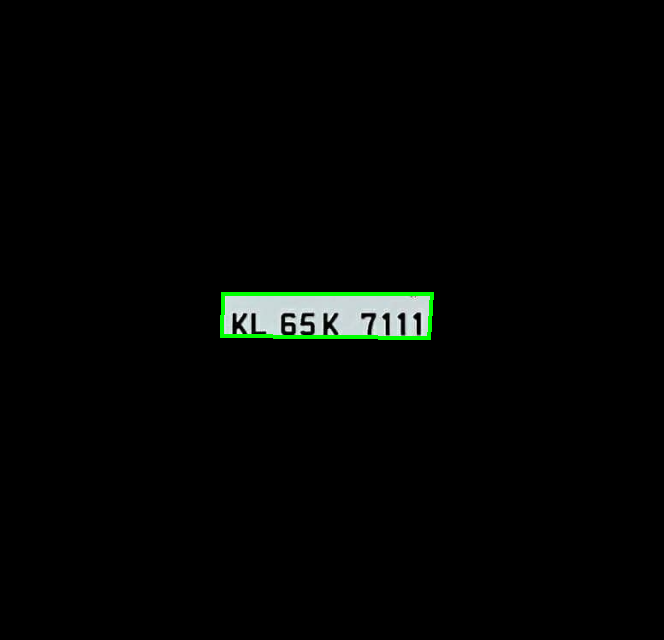

In [8]:
mask = np.zeros(gray.shape,np.uint8)
masked_image = cv2.drawContours(mask,[LPCnt],0,255,-1)
masked_image = cv2.bitwise_and(image, image, mask=mask)
cv2_imshow(masked_image)

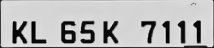

In [9]:
(x, y) = np.where(mask == 255)
(topx, topy) = (np.min(x), np.min(y))
(bottomx, bottomy) = (np.max(x), np.max(y))
LP = gray[topx:bottomx+1, topy:bottomy+1]
cv2_imshow(LP)

In [10]:
!pip install pytesseract

In [11]:
import pytesseract

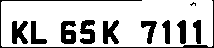

In [12]:
ret, thresh = cv2.threshold(LP,200,255,cv2.THRESH_BINARY)
cv2_imshow(thresh)

In [13]:
config = ('-l eng --oem 3')
lp_num = pytesseract.image_to_string(thresh, config=config)
print(lp_num)

 

KL 65K 7111



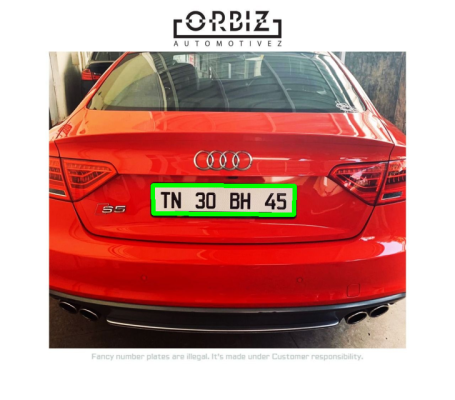

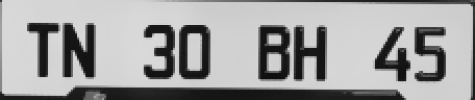

TN 30 BH 45



In [15]:
import cv2
import imutils
import numpy as np
import pytesseract

image = cv2.imread('images/lp4.jpg')
image = imutils.resize(image, height=640)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

gray = cv2.bilateralFilter(gray, 11, 17, 17)

edged = cv2.Canny(gray, 100, 200) 

cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:50]

for c in cnts:
    
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.018 * peri, True)
 
    if len(approx) == 4:
        LPCnt = approx
        cv2.drawContours(image, [LPCnt], -1, (0, 255, 0), 5)
        break


mask = np.zeros(gray.shape,np.uint8)
masked_image = cv2.drawContours(mask,[LPCnt],0,255,-1)
masked_image = cv2.bitwise_and(image, image, mask=mask)

(x, y) = np.where(mask == 255)
(topx, topy) = (np.min(x), np.min(y))
(bottomx, bottomy) = (np.max(x), np.max(y))
LP = gray[topx:bottomx+1, topy:bottomy+1]


detected_img = imutils.resize(image, height=400)
license_plate = imutils.resize(LP, height = 100)
cv2_imshow(detected_img)
cv2_imshow(license_plate)

config = ('-l eng --oem 3')
# ret, thresh = cv2.threshold(LP,200,255,cv2.THRESH_BINARY)

# cv2_imshow(thresh)
lp_num = pytesseract.image_to_string(LP, config=config)
print(lp_num)